In [1]:
#Import necessary libraries
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE

In [3]:
#!pip install shap

In [5]:
dataset = pd.read_csv('electricity_bill_dataset.csv')

In [7]:
dataset

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [11]:
dataset.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [13]:
df=dataset

In [15]:
df = df.drop(columns=['Company'])
df = df.drop(columns=['City'])

In [17]:
df

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,748,7.4,5535.2


In [19]:
independent = df.drop("ElectricityBill", axis=1)
dependent = df["ElectricityBill"]

In [21]:
independent

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate
0,16,23.0,2.0,6.0,1.0,0,10,384,8.4
1,19,22.0,2.0,3.0,1.0,0,5,488,7.8
2,7,20.0,2.0,6.0,7.0,0,7,416,7.7
3,7,22.0,3.0,21.0,1.0,0,6,475,9.2
4,11,23.0,2.0,11.0,1.0,0,2,457,9.2
...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,764,7.9
45341,23,23.0,2.0,6.0,12.0,0,2,572,8.5
45342,22,22.0,2.0,20.0,1.0,0,1,609,8.5
45343,8,21.0,2.0,22.0,7.0,0,12,748,7.4


In [23]:
dependent

0        3225.6
1        3806.4
2        3203.2
3        4370.0
4        4204.4
          ...  
45340    6035.6
45341    4862.0
45342    5176.5
45343    5535.2
45344    3544.1
Name: ElectricityBill, Length: 45345, dtype: float64

In [25]:
def feature_importance_all_models(X, y):
    tree_models = {
            'Gradient Boosting': GradientBoostingRegressor(),
            'XGBoost': XGBRegressor()
        }
    
    feature_names = X.columns
    importance_dict = {}
    
        # Tree-based models
    for name, model in tree_models.items():
        model.fit(X, y)
        importances = model.feature_importances_
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        importance_dict[name] = importance_df
    
        print(f"\n📊 Feature Importance for {name}")
        print(importance_df)
    
        plt.figure(figsize=(8, 4))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel("Importance")
        plt.title(f"Feature Importance: {name}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return importance_dict


📊 Feature Importance for Gradient Boosting
          Feature    Importance
7    MonthlyHours  9.202812e-01
8      TariffRate  7.971864e-02
0             Fan  1.909122e-07
1    Refrigerator  0.000000e+00
2  AirConditioner  0.000000e+00
3      Television  0.000000e+00
4         Monitor  0.000000e+00
5       MotorPump  0.000000e+00
6           Month  0.000000e+00


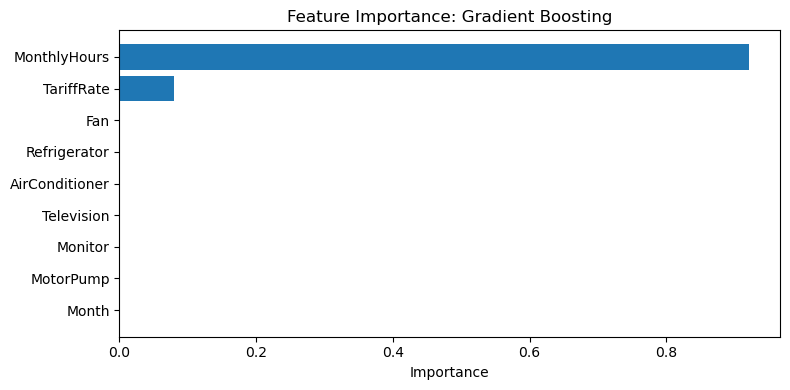


📊 Feature Importance for XGBoost
          Feature  Importance
7    MonthlyHours    0.916006
8      TariffRate    0.082204
2  AirConditioner    0.000435
4         Monitor    0.000373
6           Month    0.000293
1    Refrigerator    0.000243
3      Television    0.000231
0             Fan    0.000215
5       MotorPump    0.000000


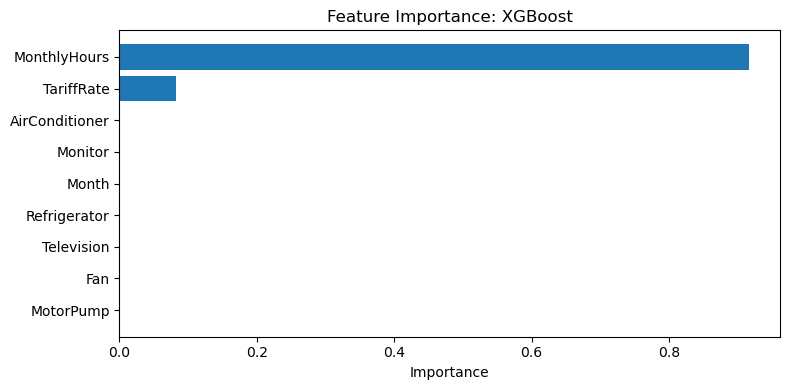

In [27]:
importance_results = feature_importance_all_models(independent, dependent)

In [28]:
def apply_rfe(X, y, k=5):
    estimator = GradientBoostingRegressor()
    selector = RFE(estimator, n_features_to_select=k)
    X_new = selector.fit_transform(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    return X_new, selector,selected_feature_names

In [29]:
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}
def evaluate_models(X_sel, y, method_name):
    X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)  
        preds = model.predict(X_test)
        r2 = r2_score(y_test, preds)
        mse = mean_squared_error(y_test, preds)

        results.append({
            'Model': name,
            'Method': method_name,
            'R2_Score': r2,
            'MSE': mse,
            'Trained_Model': model
        })

    return results

In [30]:

X_rfe, rfe_selector, rfe_features = apply_rfe(independent, dependent, k=5)

# Evaluate models
results_rfe = evaluate_models(X_rfe, dependent, method_name='RFE')

# Combine all results
combined_results = pd.DataFrame( results_rfe)

In [31]:
combined_results

,Model,Method,R2_Score,MSE,Trained_Model
0,Gradient Boosting,RFE,0.999560,501.088207,([DecisionTreeRegressor(criterion='friedman_ms...
1,XGBoost,RFE,0.999648,400.862525,"XGBRegressor(base_score=None, booster=None, ca..."


In [32]:
print(combined_results[['Model', 'Method', 'R2_Score', 'MSE']].sort_values(by='R2_Score', ascending=False))

               Model Method  R2_Score         MSE
1            XGBoost    RFE  0.999648  400.862525
0  Gradient Boosting    RFE  0.999560  501.088207


In [33]:
import pickle
best_model = combined_results.loc[0, 'Trained_Model']  # index 0 is best (Linear + SelectKBest)
pickle.dump(best_model, open("finalized_model.sav", "wb"))

# Save selected feature names
pickle.dump(rfe_features.tolist(), open("selected_features.sav", "wb"))

In [41]:
best_model

GradientBoostingRegressor()

In [43]:
#load the saved model
loaded_model=pickle.load(open("finalized_model.sav",'rb'))
selected_features = pickle.load(open("selected_features.sav", "rb"))

original_features = independent.columns.tolist()

input_values = [[1,2,	2,	3,	1,	0,	5, 600,	9.8]]  # replace with your actual input

# Create DataFrame (same column names as indep_X)
new_data = pd.DataFrame(input_values, columns=original_features)

X_new = new_data[selected_features]

# Predict
result = loaded_model.predict(X_new)

C:\Anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [45]:
new_data

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate
0,1,2,2,3,1,0,5,600,9.8


In [47]:
X_new

,Fan,MotorPump,Month,MonthlyHours,TariffRate
0,1,0,5,600,9.8


In [49]:
result

array([5568.82907066])